# All Path Finding Algorithms

## Ideas from
1. [Variants of A*](http://theory.stanford.edu/~amitp/GameProgramming/Variations.html)
2. [Robot Motion Planning](http://ais.informatik.uni-freiburg.de/teaching/ss11/robotics/slides/18-robot-motion-planning.pdf)
3. [The State of the Art Pathfinding Algorithms](https://cstheory.stackexchange.com/questions/11855/how-do-the-state-of-the-art-pathfinding-algorithms-for-changing-graphs-d-d-l)

## Dependencies

In [21]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import collections
import heapq
import copy
import numpy as np
import random

## Sample Problem

In [2]:
maps = [
    [0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0],
    [1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1],
    [0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0],
    [0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0],
    [1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0],
    [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0],
    [0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1],
    [1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1],
    [0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1],
    [1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0]]

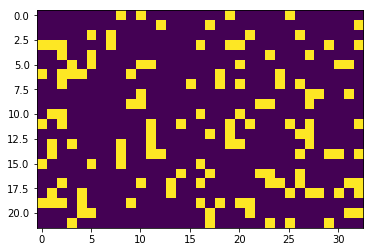

In [3]:
plt.imshow(maps)
plt.show()

## A* algorithm

In [4]:
def astar(maps, start, end):
    
    cost = {}
    cost[start[0], start[1]] = 0
    
    def manhattan(x, y):
        return abs(x[0] - y[0]) + abs(x[1] - y[1])
    
    d = [(manhattan(start, end), 0, start[0], start[1], [])]
    while d:
        fx, cx, x, y, past = heapq.heappop(d)
        
        if [x, y] == end: return past + [(x, y)]
        
        for dx, dy in [[0, 1], [1, 0], [0, -1], [-1, 0]]:
            if 0 <= x + dx < len(maps) and 0 <= y + dy < len(maps[0]) and maps[x + dx][y + dy] != 1 and cx + 1 < cost.get((x + dx, y + dy), float('inf')):
                new = manhattan([x + dx, y + dy], end) + cx + 1
                cost[x + dx, y + dy] = cx + 1
                heapq.heappush(d, (new, cx + 1, x + dx, y + dy, past + [(x, y)]))
    
    return None

In [5]:
path = astar(maps, [0, 0], [len(maps) - 1, len(maps[0]) - 1])

Total length: 54


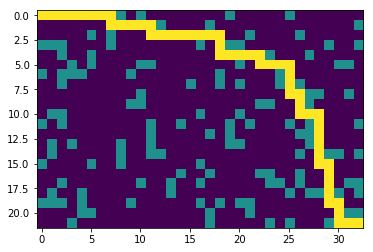

In [6]:
pmap = copy.deepcopy(maps)
for x, y in path:
    pmap[x][y] = 2

print('Total length: %s' % len(path))
plt.imshow(pmap)
plt.show()

# Greedy Best-First Search

In [7]:
def greedy(maps, start, end, prev = []):
    
    if start == end: return prev + [(start[0], start[1])]
    
    def manhattan(x, y):
        return abs(x[0] - y[0]) + abs(x[1] - y[1])
    
    x, y = start
    neighbors = sorted([(manhattan([x + dx, y + dy], end), x + dx, y + dy) for dx, dy in [[0, 1], [1, 0], [-1, 0], [0, -1]] if 0 <= x + dx < len(maps) and 0 <= y + dy < len(maps[0]) and maps[x + dx][y + dy] != 1 and (x + dx, y + dy) not in prev])
    
    for _, tx, ty in neighbors:
        res = greedy(maps, [tx, ty], end, prev + [(x, y)])
        if res: return res
    
    return None

In [8]:
path = greedy(maps, [0, 0], [len(maps) - 1, len(maps[0]) - 1])

Total length: 66


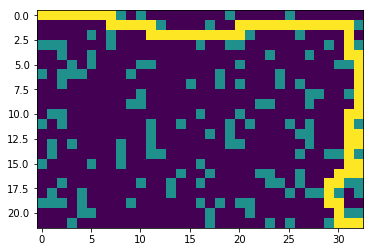

In [9]:
pmap = copy.deepcopy(maps)
for x, y in path:
    pmap[x][y] = 2

print('Total length: %s' % len(path))
plt.imshow(pmap)
plt.show()

## A* with Map Smoothing

In [10]:
def smoothing(maps):
    
    new = [[0] * len(maps[0]) for _ in range(len(maps))]
    for i in range(len(maps)):
        for j in range(len(maps[0])):
            neighbors = [maps[i][j]]
            for di, dj in [[0, 1], [1, 0], [0, -1], [-1, 0]]:
                if 0 <= i + di < len(maps) and 0 <= j + dj < len(maps[0]):
                    neighbors.append(maps[i + di][j + dj])
            new[i][j] = np.mean(neighbors)
    return new

In [11]:
curr = maps
for _ in range(2):
    curr = smoothing(curr)

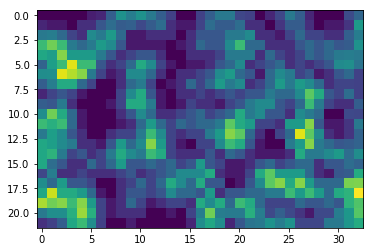

In [12]:
plt.imshow(curr)
plt.show()

In [13]:
def astar_smooth(maps, smoothed, start, end):
    
    cost = {}
    cost[start[0], start[1]] = 0
    
    def manhattan(x, y):
        return abs(x[0] - y[0]) + abs(x[1] - y[1])
    
    d = [(manhattan(start, end), 0, start[0], start[1], [])]
    while d:
        fx, cx, x, y, past = heapq.heappop(d)
        
        if [x, y] == end: return past + [(x, y)]
        
        for dx, dy in [[0, 1], [1, 0], [0, -1], [-1, 0]]:
            if 0 <= x + dx < len(maps) and 0 <= y + dy < len(maps[0]) and maps[x + dx][y + dy] != 1 and cx + 1 < cost.get((x + dx, y + dy), float('inf')):
                temp = (cx + 1) * smoothed[x + dx][y + dy]
                new = manhattan([x + dx, y + dy], end) + temp
                cost[x + dx, y + dy] = temp
                heapq.heappush(d, (new, cx + 1, x + dx, y + dy, past + [(x, y)]))
    
    return None 

In [14]:
path = astar_smooth(maps, curr, [0, 0], [len(maps) - 1, len(maps[0]) - 1])

Total length: 56


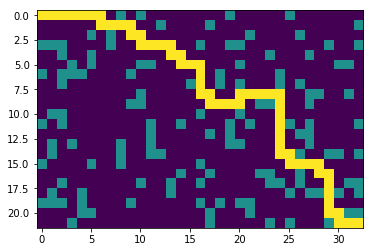

In [15]:
pmap = copy.deepcopy(maps)
for x, y in path:
    pmap[x][y] = 2

print('Total length: %s' % len(path))
plt.imshow(pmap)
plt.show()

## Bidirectional A*

In [16]:
def bidirectional_retargeting(maps, step_size, s, e):
    
    def astar(maps, start, end, step_size):
    
        cost = {}
        cost[start[0], start[1]] = 0

        def manhattan(x, y):
            return abs(x[0] - y[0]) + abs(x[1] - y[1])

        d = [(manhattan(start, end), 0, start[0], start[1], [])]
        i = 0
        while d and i < step_size:
            fx, cx, x, y, past = heapq.heappop(d)

            if (x, y) == end: return (x, y), past + [(x, y)]

            for dx, dy in [[0, 1], [1, 0], [0, -1], [-1, 0]]:
                if 0 <= x + dx < len(maps) and 0 <= y + dy < len(maps[0]) and maps[x + dx][y + dy] != 1 and cx + 1 < cost.get((x + dx, y + dy), float('inf')):
                    new = manhattan([x + dx, y + dy], end) + cx + 1
                    cost[x + dx, y + dy] = cx + 1
                    heapq.heappush(d, (new, cx + 1, x + dx, y + dy, past + [(x, y)]))
            i += 1

        _, _, x, y, past = heapq.heappop(d)
        return (x, y), past
    
    hist1, hist2 = [], []
    turn = True
    while s != e:
        node, past = astar(maps, s, e, step_size)
        
        if turn:
            e, s = node, e
            hist1 += past
            turn = not turn
        else:
            s, e = e, node
            hist2 += past
            turn = not turn
    
    return hist1, hist2[::-1]

In [17]:
path1, path2 = bidirectional_retargeting(maps, 100, [0, 0], [len(maps) - 1, len(maps[0]) - 1])

Total length: 58


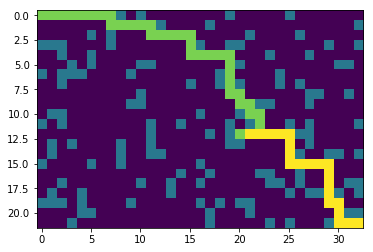

In [18]:
pmap = copy.deepcopy(maps)
for x, y in path1:
    pmap[x][y] = 2
    
for x, y in path2:
    pmap[x][y] = 2.5

print('Total length: %s' % (len(path1) + len(path2)))
plt.imshow(pmap)
plt.show()